**Abstract.**

In [20]:
import matplotlib.pyplot as plt

# Table of Contents

# Feature Importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:

* Better understanding the data.
* Better understanding a model.
* Reducing the number of input features.

Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

Feature importance scores can provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

Feature importance can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

> Often, we desire to quantify the strength of the relationship between the predictors and the outcome. […] Ranking predictors in this manner can be very useful when sifting through large amounts of data.

(pp. 463, [KJ18])

Feature importance scores can be fed to a wrapper model, such as the `SelectFromModel` class, to perform feature selection.

There are many ways to calculate feature importance scores and many models that can be used for this purpose.

Perhaps the simplest way is to calculate simple coefficient statistics between each feature and the target variable. For more on this approach, see the tutorial:

How to Choose a Feature Selection Method for Machine Learning

In this tutorial, we will look at three main types of more advanced feature importance; they are:

* Feature importance from model coefficients.
* Feature importance from decision trees.
* Feature importance from permutation testing.

Let’s take a closer look at each.

# Datasets

Next, let’s define some test datasets that we can use as the basis for demonstrating and exploring feature importance scores.

Each test problem has five important and five unimportant features, and it may be interesting to see which methods are consistent at finding or differentiating the features based on their importance.

## Classification Dataset

We will use the `make_classification()` function to create a test binary classification dataset.

The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant. We will fix the random number seed to ensure we get the same examples each time the code is run.

An example of creating and summarizing the dataset is listed below.

In [16]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X_clf.shape, y_clf.shape)

(1000, 10) (1000,)


## Regression Dataset

We will use the `make_regression()` function to create a test regression dataset.

Like the classification dataset, the regression dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five that will be redundant.

In [17]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X_reg.shape, y_reg.shape)

(1000, 10) (1000,)


# Coefficients as Feature Importance

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Examples include linear regression, logistic regression, and extensions that add regularization, such as ridge regression and the elastic net.

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

Let’s take a closer look at using coefficients as feature importance for classification and regression. We will fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and finally create a bar chart to get an idea of the relative importance of the features.

## Linear Regression Feature Importance

We can fit a LinearRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

The complete example of linear regression coefficients for feature importance is listed below.

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


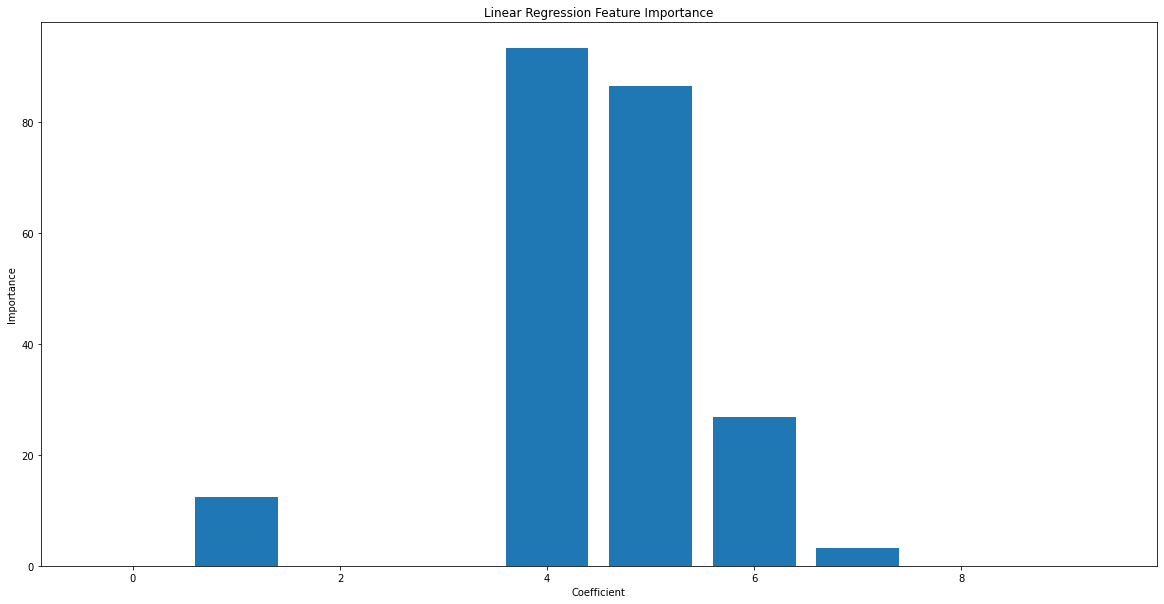

In [18]:
# linear regression feature importance

from sklearn.linear_model import LinearRegression

# define the model
lr = LinearRegression()
# fit the model
lr.fit(X_reg, y_reg)
# get importance
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar([x for x in range(len(importance))], importance)
ax.set(title="Linear Regression Feature Importance", xlabel="Coefficient", ylabel="Importance");

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The scores suggest that the model found the five important features and marked all other features with a zero coefficient, essentially removing them from the model.

## Logistic Regression Feature Importance

We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

The complete example of logistic regression coefficients for feature importance is listed below.

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


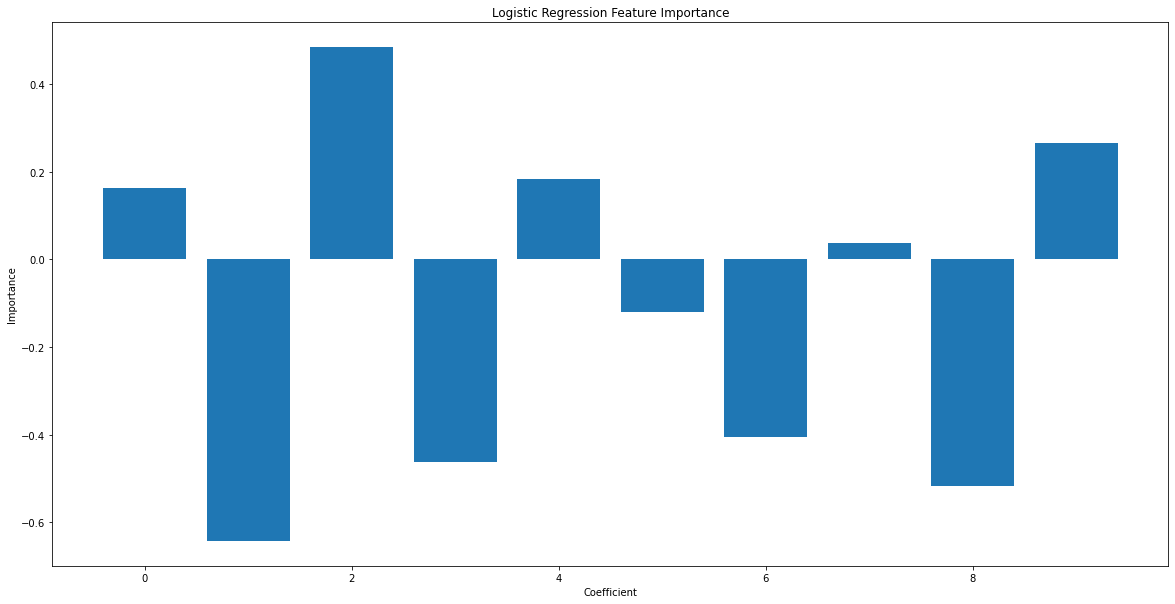

In [22]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
# define dataset
clf = LogisticRegression()
# fit the model
clf.fit(X_clf, y_clf)
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar([x for x in range(len(importance))], importance)
ax.set(title="Logistic Regression Feature Importance", xlabel="Coefficient", ylabel="Importance");

No clear pattern of important and unimportant features can be identified from these results, at least from what I can tell.

# Decision Tree Feature Importance

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

Let’s take a look at a worked example of each.

## CART Feature Importance

We can use the CART algorithm for feature importance implemented in scikit-learn as the `DecisionTreeRegressor` and `DecisionTreeClassifier` classes.

After being fit, the model provides a `feature_importances_` property that can be accessed to retrieve the relative importance scores for each input feature.

Let’s take a look at an example of this for regression and classification.
CART Regression Feature Importance

The complete example of fitting a DecisionTreeRegressor and summarizing the calculated feature importance scores is listed below.

In [30]:
from sklearn.tree import DecisionTreeRegressor
# define the model
dtr = DecisionTreeRegressor()
# fit the model
dtr.fit(X_reg, y_reg)
# get importance
importance = dtr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00239
Feature: 1, Score: 0.00437
Feature: 2, Score: 0.00233
Feature: 3, Score: 0.00149
Feature: 4, Score: 0.51724
Feature: 5, Score: 0.43861
Feature: 6, Score: 0.02719
Feature: 7, Score: 0.00280
Feature: 8, Score: 0.00261
Feature: 9, Score: 0.00097


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps three of the 10 features as being important to prediction.

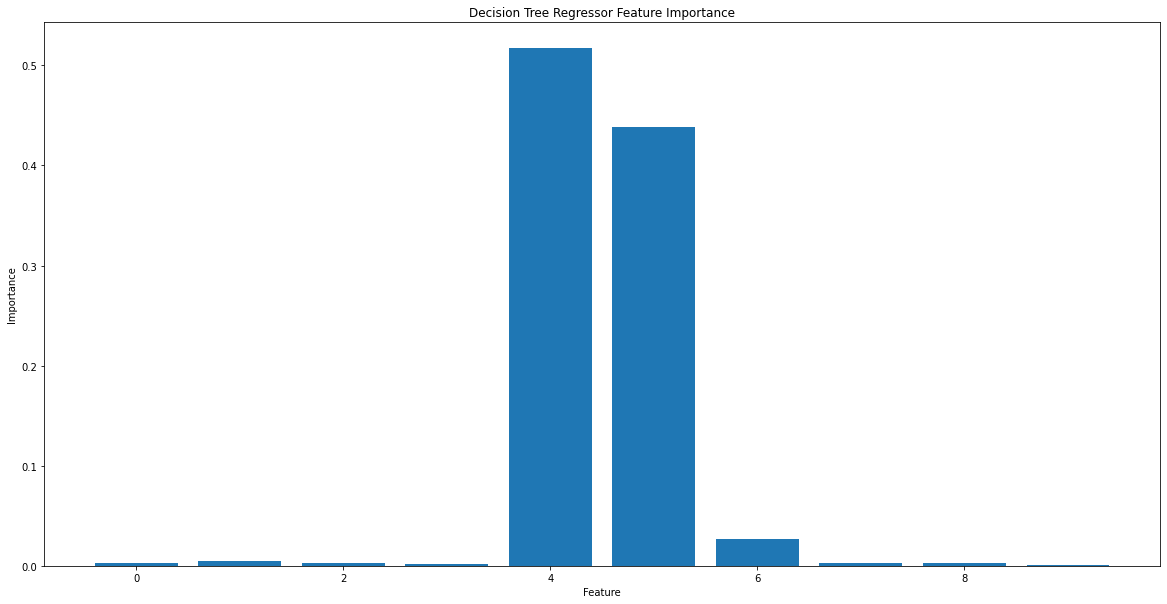

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar([x for x in range(len(importance))], importance)
ax.set(title="Decision Tree Regressor Feature Importance", xlabel="Feature", ylabel="Importance");

## CART Classification Feature Importance

The complete example of fitting a `DecisionTreeClassifier` and summarizing the calculated feature importance scores is listed below.

In [33]:
from sklearn.tree import DecisionTreeClassifier

# define the model
dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_clf, y_clf)
# get importance
importance = dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01355
Feature: 1, Score: 0.01296
Feature: 2, Score: 0.18294
Feature: 3, Score: 0.30976
Feature: 4, Score: 0.08493
Feature: 5, Score: 0.00700
Feature: 6, Score: 0.17866
Feature: 7, Score: 0.03093
Feature: 8, Score: 0.13275
Feature: 9, Score: 0.04652


Running the example fits the model, then reports the coefficient value for each feature.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps four of the 10 features as being important to prediction.

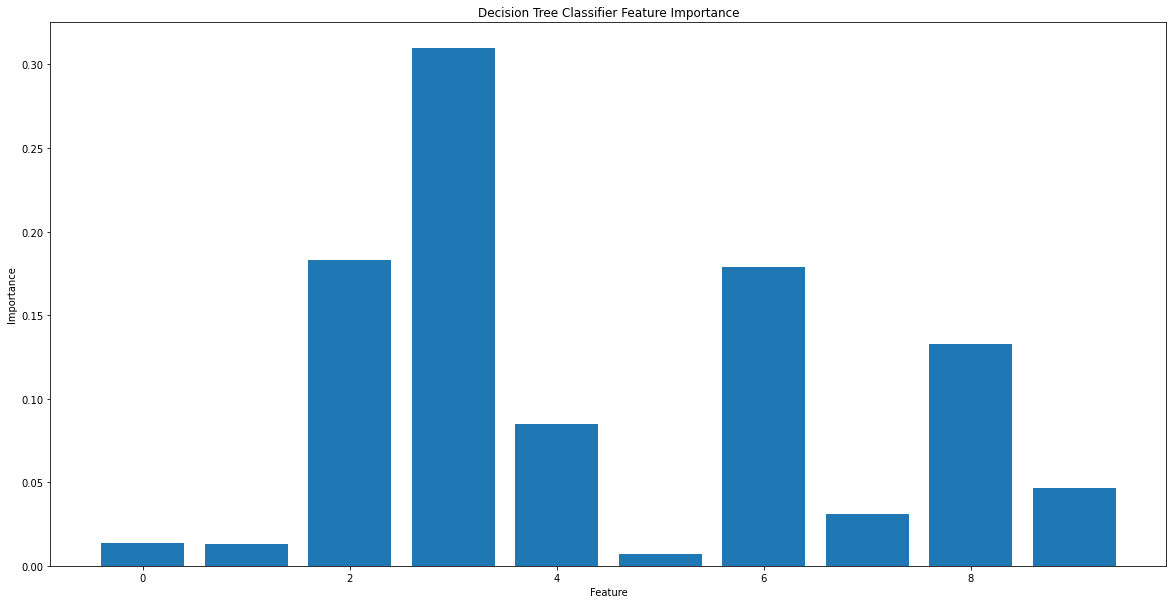

In [35]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar([x for x in range(len(importance))], importance)
ax.set(title="Decision Tree Classifier Feature Importance", xlabel="Feature", ylabel="Importance");

# References

[1] https://machinelearningmastery.com/calculate-feature-importance-with-python/

## Tutorials

[1] [How to Calculate Feature Importance With Python](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

[2] [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

[3] [How to Perform Feature Selection with Categorical Data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)

[4] [Feature Importance and Feature Selection With XGBoost in Python](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)

[5] [Feature Selection For Machine Learning in Python](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

[6] A[n Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)

## Books

[KJ18] Kuhn, M. and Johnson, K., "Applied Predictive Modeling", Springer, 1st ed., 2018

In [23]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Aug 29 2021

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.25.0

sys       : 3.9.6 (default, Jul 22 2021, 15:24:21) 
[GCC 8.3.0]
matplotlib: 3.4.2

Watermark: 2.2.0

